In [2]:
import pandas as pd
import numpy as np
import pickle as p
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_json("../data/source/Hospitals.json",orient="records")

In [4]:
df.head()

,Name,Lat,Lon,Id
0,Total Rf Heliport,40.070801,-74.933601,6523
1,Aero B Ranch Airport,38.704022,-101.473911,323361
2,Lowell Field,59.949200,-151.695999,6524
3,Epps Airpark,34.864799,-86.770302,6525
4,Newport Hospital & Clinic Heliport,35.608700,-91.254898,6526


In [5]:
A = dict(start_name=df["Name"],start_lon=df["Lat"],start_lat=df["Lon"])

In [6]:
pd.DataFrame(A).to_csv("../data/csv/WorldHospitals.csv",index=False,encoding="UTF-8")

In [7]:
df = pd.DataFrame(A)

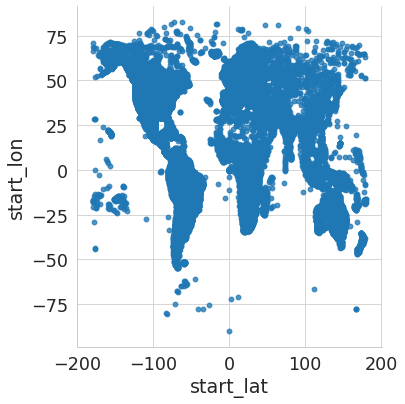

In [8]:
sns.set_context("paper",font_scale=2)
sns.set_style("whitegrid")
sns.lmplot(data=df,x="start_lat",y="start_lon",fit_reg=False,height=6)

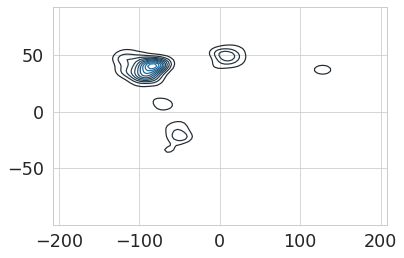

In [14]:
sns.kdeplot(df[["start_lat","start_lon"]])

In [15]:
A = list(zip(df["start_lat"],df["start_lon"]))

In [16]:
A[0]

(-74.9336013794, 40.0708007812)

In [17]:
from classes.Algorithms.Algorithms import Algorithms

### Sorting half of the dataset. 

In [ ]:
c = Algorithms().euclideanDistance(list(map(lambda e:A[e],range(len(A)//2))))

### Sorting the whole dataset

In [12]:
c = Algorithms().euclideanDistance(A)

--- 5:20:36 CPU Elapsed Time. ---
Seconds:	19236.193078 


In [13]:
with open("../data/rest/HospitalSORT.dat","wb") as f:
    p.dump(c,f)
    f.close()

In [22]:
with open("../data/rest/HospitalSORT.dat","rb") as f:
    c = p.load(f)
    f.close()

In [23]:
c

[((-74.9336013794, 40.0708007812), (-74.894203186, 40.0812988281)),
 ((-101.473911, 38.704022), (-101.4209976196, 38.7042007446)),
 ((-104.344002, 40.622202), (-104.2080001831, 40.6707992554)),
 ((-74.1371002197, 40.7417984009), (-74.1188964844, 40.7378005981)),
 ((-122.861999512, 42.3386993408), (-122.8730010986, 42.3741989136)),
 ((-85.5813980103, 42.2869987488), (-85.5580978394, 42.3073005676)),
 ((-92.8276977539, 47.4183006287), (-92.83899689, 47.38660049)),
 ((-93.1974029541, 45.6115989685), (-93.231361, 45.56545)),
 ((-93.5187988281, 47.418598175), (-93.50980377, 47.21110153)),
 ((-96.4412002563, 46.6651992798), (-96.4508972168, 46.6712989807)),
 ((-93.2373962402, 44.966999054), (-93.2343978882, 44.9719009399)),
 ((-96.3515014648, 46.7118988037), (-96.4412002563, 46.6651992798)),
 ((-93.6996994019, 44.6433982849), (-93.6369018555, 44.6833000183)),
 ((-94.616897583, 43.9799995422), (-94.5578994751, 43.9863014221)),
 ((-95.576104, 45.973098), (-95.5261993408, 45.9364013672)),
 ((-1

In [22]:
locations = dict(zip(zip(df["start_lat"],df["start_lon"]),df["start_name"]))
locations

{(-74.9336013794, 40.0708007812): 'Total Rf Heliport',
 (-101.473911, 38.704022): 'Aero B Ranch Airport',
 (-104.344002, 40.622202): 'Cass Field',
 (-74.1371002197, 40.7417984009): 'Albert Guido Memorial Heliport',
 (-122.861999512, 42.3386993408): 'Providence Hospital Heliport',
 (-85.5813980103, 42.2869987488): 'Bronson Methodist Hospital Heliport',
 (-92.8276977539, 47.4183006287): 'Carey Lake Seaplane Base',
 (-93.1974029541, 45.6115989685): 'Troll Farm Airport',
 (-93.5187988281, 47.418598175): 'Wabana Seaplane Base',
 (-96.4412002563, 46.6651992798): 'Barnesville Municipal Airport',
 (-93.2373962402, 44.966999054): 'Fairview Riverside Medical Center Heliport',
 (-96.3515014648, 46.7118988037): 'Janssen Airport',
 (-93.6996994019, 44.6433982849): 'Merill L Harris Field',
 (-94.616897583, 43.9799995422): 'Watonwan Memorial Hospital Heliport',
 (-95.576104, 45.973098): 'Whiskey Lake Seaplane Base',
 (-123.4509963989, 42.1332015991): 'Hendershots Heliport',
 (-90.8235, 47.588003): 'T

In [24]:
df["end_name"] = [locations[c[e][1]] for e in range(len(c))]

,start_name,start_lon,start_lat,end_name
0,Total Rf Heliport,40.070801,-74.933601,Sterling Heliport
1,Aero B Ranch Airport,38.704022,-101.473911,Arrow B Ranch Airport
10,Cass Field,40.622202,-104.344002,William Leon Schawo Airport
100,Albert Guido Memorial Heliport,40.741798,-74.137100,Essex Generating Station Heliport
1000,Providence Hospital Heliport,42.338699,-122.862000,Rogue Valley International Medford Airport


In [25]:
start,end_locations = zip(*c)
d = pd.DataFrame(np.matrix(end_locations),columns=["end_lon","end_lat"])

In [26]:
df["end_lon"] = d["end_lon"]
df["end_lat"] = d["end_lat"]

In [27]:
df.head()

,start_name,start_lon,start_lat,end_name,end_lon,end_lat
0,Total Rf Heliport,40.070801,-74.933601,Sterling Heliport,-74.894203,40.081299
1,Aero B Ranch Airport,38.704022,-101.473911,Arrow B Ranch Airport,-101.420998,38.704201
10,Cass Field,40.622202,-104.344002,William Leon Schawo Airport,-93.234398,44.971901
100,Albert Guido Memorial Heliport,40.741798,-74.137100,Essex Generating Station Heliport,-83.595200,40.961700
1000,Providence Hospital Heliport,42.338699,-122.862000,Rogue Valley International Medford Airport,-60.480400,-31.794800


In [32]:
pf = pd.DataFrame(np.matrix([
    df["start_name"],
    df["end_name"],
    list(zip(df["start_lat"],df["start_lon"])),
    list(zip(df["end_lat"],df["end_lon"])),
]).transpose(),columns=["start_name","end_name","start_loc","end_loc"])
pf.to_csv("../data/wolfram/BigHospitalSort.csv")

In [79]:
df.to_csv("../data/csv/BigHospitalsSORT.csv",encoding="UTF-8",index=False)
df.to_json("../data/rest/BigHospitalSORT.json",orient="records")

In [24]:
df = pd.read_csv("../data/csv/BigHospitalsSORT.csv")
df.head()

,name,start_lat,start_lon,end_name,end_lon,end_lat
0,Total Rf Heliport,40.070801,-74.933601,Sterling Heliport,-74.894203,40.081299
1,Aero B Ranch Airport,38.704022,-101.473911,Arrow B Ranch Airport,-101.420998,38.704201
2,Cass Field,40.622202,-104.344002,William Leon Schawo Airport,-93.234398,44.971901
3,Albert Guido Memorial Heliport,40.741798,-74.137100,Essex Generating Station Heliport,-83.595200,40.961700
4,Providence Hospital Heliport,42.338699,-122.862000,Rogue Valley International Medford Airport,-60.480400,-31.794800


In [27]:
from pymongo import MongoClient

In [29]:
client = MongoClient(host="192.168.1.97",port=27017)["bsd"]

In [41]:
for idx, e in df.iterrows():
    client["worldHospitals"].insert_one(
    dict(
        startName=e["name"],
        startLat=e["start_lat"],
        startLon=e["start_lon"], 
        endName=e["end_name"],
        endLon=e["end_lon"],
        endLat=e["end_lat"]
        )
    )